In [1]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
client = bigquery.Client()
q = "SELECT * FROM `mlops-zoomcamp-354700.energy_data_prod.fact_eia_demand_historical`"
df_raw = pd.read_gbq(q, project_id='mlops-zoomcamp-354700')
df_raw.head()

,series_id,timestamp_UTC,timestamp_MTN,value,units,name,updated
0,EBA_PSCO-ALL_D_H,2015-07-01 07:00:00+00:00,2015-07-01 01:00:00,4875.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400
1,EBA_PSCO-ALL_D_H,2015-07-01 08:00:00+00:00,2015-07-01 02:00:00,4618.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400
2,EBA_PSCO-ALL_D_H,2015-07-01 09:00:00+00:00,2015-07-01 03:00:00,4427.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400
3,EBA_PSCO-ALL_D_H,2015-07-01 10:00:00+00:00,2015-07-01 04:00:00,4344.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400
4,EBA_PSCO-ALL_D_H,2015-07-01 11:00:00+00:00,2015-07-01 05:00:00,4374.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400


In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61037 entries, 0 to 61036
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   series_id      61037 non-null  object             
 1   timestamp_UTC  61037 non-null  datetime64[ns, UTC]
 2   timestamp_MTN  61037 non-null  datetime64[ns]     
 3   value          61000 non-null  float64            
 4   units          61037 non-null  object             
 5   name           61037 non-null  object             
 6   updated        61037 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(4)
memory usage: 3.3+ MB


<AxesSubplot:xlabel='timestamp_MTN'>

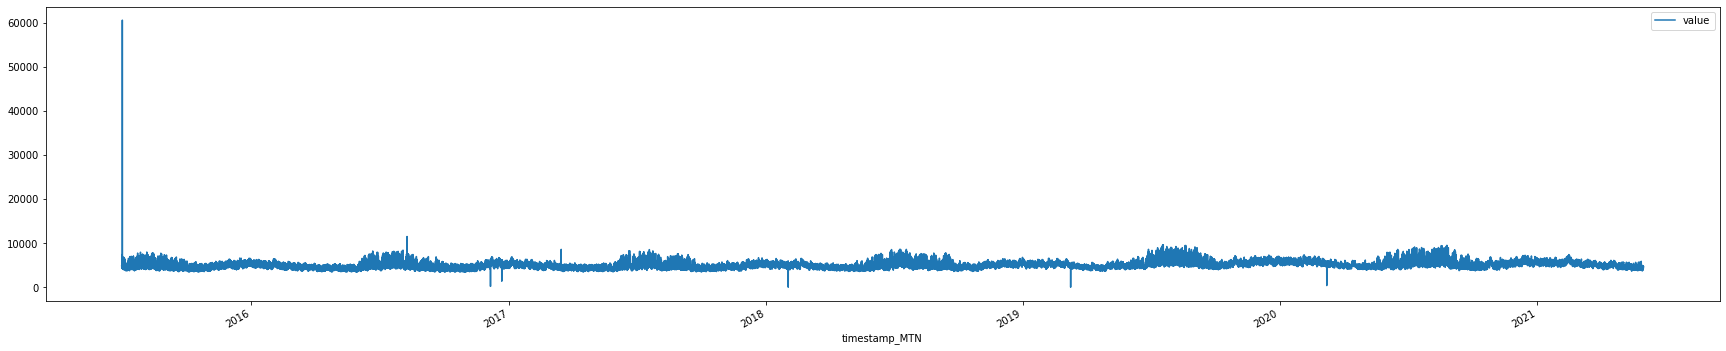

In [13]:
df_train_raw = df_raw[df_raw['timestamp_MTN'] < pd.to_datetime('2021-06-01')]
df_train_raw.plot(x='timestamp_MTN', y='value', figsize=(30, 6))

In [14]:
df_trim

,series_id,timestamp_UTC,value,units,name,updated
timestamp_MTN,,,,,,
2015-07-01 01:00:00,EBA_PSCO-ALL_D_H,2015-07-01 07:00:00+00:00,4875.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400
2015-07-01 02:00:00,EBA_PSCO-ALL_D_H,2015-07-01 08:00:00+00:00,4618.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400
2015-07-01 03:00:00,EBA_PSCO-ALL_D_H,2015-07-01 09:00:00+00:00,4427.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400
2015-07-01 04:00:00,EBA_PSCO-ALL_D_H,2015-07-01 10:00:00+00:00,4344.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400
2015-07-01 05:00:00,EBA_PSCO-ALL_D_H,2015-07-01 11:00:00+00:00,4374.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400
...,...,...,...,...,...,...
2021-05-31 19:00:00,EBA_PSCO-ALL_D_H,2021-06-01 01:00:00+00:00,4714.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400
2021-05-31 20:00:00,EBA_PSCO-ALL_D_H,2021-06-01 02:00:00+00:00,4706.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400
2021-05-31 21:00:00,EBA_PSCO-ALL_D_H,2021-06-01 03:00:00+00:00,4788.0,megawatthours,Demand for Public Service Company of Colorado ...,2022-06-17T07:48:44-0400


<AxesSubplot:xlabel='timestamp_MTN'>

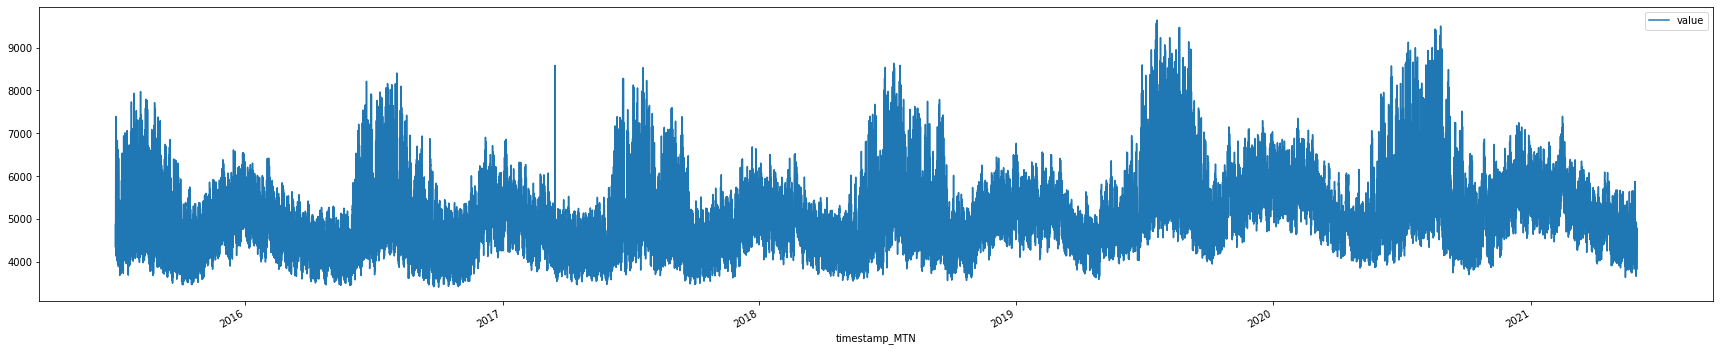

In [17]:
def clean_data(df, min_val, max_val):
    return df[df['value'].between(min_val, max_val)].set_index('timestamp_MTN')
              
df_trim = clean_data(df_train_raw, 2000, 11_000)
df_trim.reset_index().plot(x='timestamp_MTN', y='value', figsize=(30, 6))

(2015.0, 2020.0)

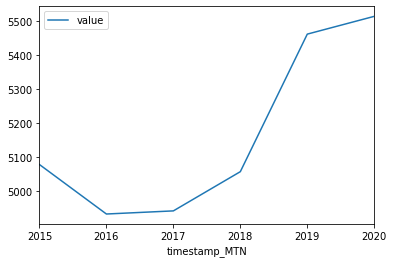

In [22]:
ax = df_trim.groupby(df_trim.index.year).mean().plot()
ax.set_xlim(2015, 2020)

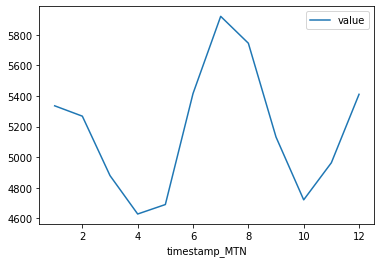

In [28]:
ax = df_trim.groupby(df_trim.index.month).mean().plot()

In [ ]:
df_trim.groupby([df_trim.index.

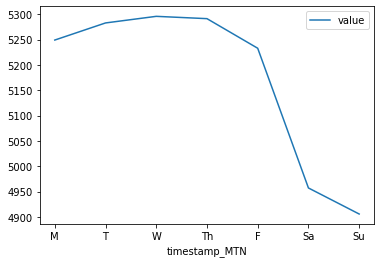

In [18]:
ax = df_trim.groupby(df_trim.index.dayofweek).mean().plot()
ax.set_xticks(range(0,7))
ax.set_xticklabels(['M', 'T', 'W', 'Th', 'F', 'Sa', 'Su']);